<div style="border: 2px solid #808080; padding: 10px; border-radius: 5px; background-color: #D3D3D3; color: black; text-align: center;">
  <h1 style="margin: 0;">Optimization 🎯</h1>
</div>

Optimization is the process of finding the <u>best solution</u> to a problem from a set of <u>feasible solutions</u>. It involves selecting the most effective, efficient, or generally, "optimal" outcome, typically by maximizing or minimizing a certain **<u>objective function</u>** under given <u>constraints</u>.

A fantastic (*paid*) course: [RWTHx: Mathematical Optimization for Engineers](https://www.edx.org/learn/math/rwth-aachen-university-mathematical-optimization-for-engineers?fbclid=IwY2xjawE2tQ9leHRuA2FlbQIxMAABHbztjKGJRIMuwx8NMrrT6dM6JKsSGZhcDGduPAshyokbkbyG1e6-iLhs9Q_aem_rZmclgdplzgeaVjCeMLW-Q)

### Mathematical Formulation

Optimization problems can be mathematically formulated as follows:

$$
\begin{aligned}
& \text{Minimize or Maximize} \quad & f(x) & \\
& \text{Subject to} \quad & g_i(x) &\leq b_i, \quad i = 1, \dots, m \\
& & h_j(x) &= c_j, \quad j = 1, \dots, p \\
& \text{where} \quad & x &\in \mathbb{R}^n
\end{aligned}
$$

- **Objective Function $f(x)$**: The function that represents the goal of the optimization (e.g., cost, time, energy).
- **Decision Variables $x$**: The variables that can be adjusted to optimize the objective function.
- **Inequality Constraints $g_i(x)$**: Conditions that limit the values the decision variables can take (e.g., resource limits).
- **Equality Constraints $h_j(x)$**: Conditions that must be exactly satisfied (e.g., balance equations).

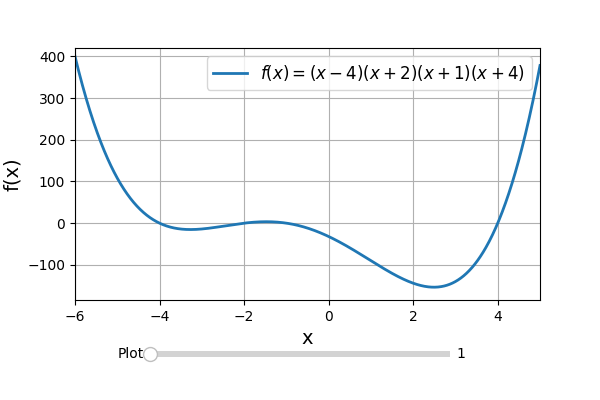

In [1]:
# Enable interactive mode for Jupyter using ipympl
import matplotlib.pyplot as plt
%matplotlib widget

# Import the function from the Python module
from figures.optimization_base_figures import create_slider_plot

# Call the function to create the interactive slider plot
create_slider_plot()

In [2]:
plt.close('all')
%matplotlib inline

### Degrees of Freedom

Degrees of freedom refer to the number of independent variables that can be adjusted in the optimization process. The number of degrees of freedom is given by:

$$
\text{Degrees of Freedom} = \text{Number of Variables} - \text{Number of Independent Equality Constraints}
$$

- If the degrees of freedom are **negative**, the problem is <u><span style="color: orange;">overdetermined</span></u>, implying no feasible solution may exist.
- If the degrees of freedom are **zero**, the problem is fully <u><span style="color: lightblue;">determined</span></u>, with a unique (*set of*) solutions (if it exists) --> happens in standard **LCA!**
- If the degrees of freedom are **positive**, the problem is <u><span style="color: lightgreen;">underdetermined</span></u>, meaning multiple solutions may exist --> happens in **LCO**!

### Addressing Complexities in Optimization

Optimization can handle a wide range of complexities, including:

- **Non-linearities**: Problems where the objective function or constraints are non-linear. These require specialized algorithms like non-linear programming.
- **Integer Variables**: Optimization problems where some or all decision variables must take integer values. These are solved using techniques like integer programming.
- **Stochastic Optimization**: Problems where the objective function or constraints involve randomness or uncertainty, requiring probabilistic methods or robust optimization.
- **Multi-objective Optimization**: Problems with more than one objective function. The solutions are often found using Pareto optimization or weighted sum approaches.


<div style="border: 2px solid #FF8C00; padding: 10px; border-radius: 5px; background-color: #FFF3E0; color: #4E342E; text-align: center;">
  <h3 style="margin: 0;">Example: Heat Exchanger 🔥</h3>
</div>

<u>Goal</u>: Minimize the total cost, which includes utility costs and the heat exchanger capital cost.

<u>No inter-stream exchange</u>
<div style="text-align: center;">
    <img src="figures/heat_exchanger-no-Exchange_light.svg" alt="" width="410">
</div>
<u>With heat exchange</u>
<div style="text-align: center;">
    <img src="figures/heat_exchanger-Superstructure_light.svg" alt="" width="450">
</div>

____________________
##### Typical Process Integration Behaviour

This figure illustrates the typical trade-off between investment cost, operating cost, and combined cost as a function of the degree of integration:

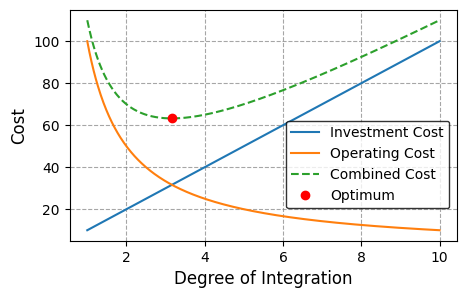

In [3]:
from figures.optimization_figures import plot_cost_tradeoff
import numpy as np

# Define the range of x values (e.g., scale or capacity)
x = np.linspace(1, 10, 500)

# Define the costs
investment_cost = 10 * x  # Linear increase in investment cost
operating_cost = 100 / x   # 1/x decrease in operating cost
combined_cost = investment_cost + operating_cost  # Combined cost

# Plot the cost tradeoff
plot_cost_tradeoff(x, investment_cost, operating_cost, combined_cost)

The combined cost curve shows a minimum at the optimum point, where the total cost is minimized. In this demonstration, we are looking for this optimum, which will correspond to a certain heat exchanger area.
______________________

##### Variables

  -  $T_{h,out}$: Outlet temperature of the hot stream (to be optimized).
  - $T_{c,out}$: Outlet temperature of the cold stream (calculated from energy balance).
  - $\Delta T_{lm}$: Logarithmic mean temperature difference.
  - $Q$: Heat transferred.
  - $A$: Heat exchanger area.
___________________
##### Constants (Parameters)

- **Inlet Temperatures**:
  - $T_{h,in} = 150^\circ C$: Inlet temperature of the hot stream.
  - $T_{c,in} = 25^\circ C$: Inlet temperature of the cold stream.

- **Target Outlet Temperatures**:
  - $T_{h,out}^{\text{target}} = 50^\circ C$: Target outlet temperature of the hot stream.
  - $T_{c,out}^{\text{target}} = 200^\circ C$: Target outlet temperature of the cold stream.

- **Heat Capacity Flow Rates**:
  - $C_h = 5000 \, \text{W/K}$: Heat capacity flow rate of the hot stream.
  - $C_c = 3000 \, \text{W/K}$: Heat capacity flow rate of the cold stream.

- **Overall Heat Transfer Coefficient**:
  - $U = 300 \, \text{W/m}^2\text{K}$: Overall heat transfer coefficient.

- **Utility Costs**:
  - $C_{hot} = 0.020 \, \text{\$/W}$: Cost per unit energy of hot utility.
  - $C_{cold} = 0.015 \, \text{\$/W}$: Cost per unit energy of cold utility.

- **Heat Exchanger Cost Parameters**:
  - $C_A = 1000 \, \text{\$/m}^2$: Cost coefficient for the heat exchanger area.
  - $n = 0.7$: Scaling exponent for heat exchanger cost.
______

##### Objective Function
Minimize the total cost:
$$
\text{Total Cost} = \textcolor{#FF8C00}{C_h} \cdot (T_{h,out} - T_{h,out}^{\text{target}}) \cdot C_{hot} + \textcolor{#1E90FF}{C_c} \cdot (T_{c,out}^{\text{target}} - T_{c,out}) \cdot C_{cold} + \textcolor{#9370DB}{C_A} \cdot A^n
$$
_____________________
##### Constraints
1. **Energy Balance**:
$$
Q = C_h \cdot (T_{h,in} - T_{h,out})
$$
$$
Q = C_c \cdot (T_{c,out} - T_{c,in})
$$

2. **Logarithmic Mean Temperature Difference (LMTD)**:
$$
\Delta T_{lm} = \frac{(T_{h,in} - T_{c,out}) - (T_{h,out} - T_{c,in})}{\ln \left( \frac{T_{h,in} - T_{c,out}}{T_{h,out} - T_{c,in}} \right)}
$$

3. **Heat Transfer Equation**:
$$
Q = U \cdot A \cdot \Delta T_{lm}
$$

4. **Non-Negativity Constraints**:
$$
T_{h,out} \geq T_{c,in}, \quad 1000 m^2 \geq  A \geq 0m^2
$$




<div style="border: 2px solid #FF8C00; padding: 10px; border-radius: 5px; background-color: #FFF3E0; color: #4E342E; text-align: center;">
  <h5 style="margin: 0;">Implementation in Python (using <em>pyomo</em>)</h5>
</div>

In [4]:
### install if needed ###  
# pip install pyomo  
# conda install -c conda-forge ipopt=3.11.1

from pyomo.environ import ConcreteModel, Var, Objective, Constraint, SolverFactory, NonNegativeReals, log, minimize  

# Constants  
T_h_in = 150  # °C, Inlet temperature of hot stream  
T_c_in = 25   # °C, Inlet temperature of cold stream  
T_h_out_target = 50  # °C, Target outlet temperature of hot stream  
T_c_out_target = 200 # °C, Target outlet temperature of cold stream  
C_h = 5000    # W/K, Heat capacity flow rate of hot stream  
C_c = 3000    # W/K, Heat capacity flow rate of cold stream  
U = 1000      # W/m²K, Overall heat transfer coefficient  
C_hot = 0.020 # $/W, Cost per unit energy of hot utility  
C_cold = 0.015 # $/W, Cost per unit energy of cold utility  
C_A = 1000    # $/m², Cost coefficient for heat exchanger area  
n = 0.7       # Scaling exponent for heat exchanger cost  

# Define the variables for the model
def define_variables(model):
    model.T_h_out = Var(within=NonNegativeReals, bounds=(T_c_in, T_h_in))  # °C  
    model.T_c_out = Var(within=NonNegativeReals, bounds=(T_c_in, T_h_in))  # °C  
    model.Q = Var(within=NonNegativeReals, bounds=(0, 1e8))  # W, Heat transferred  
    model.A = Var(within=NonNegativeReals, bounds=(0, 1000), initialize=1)  # m², Heat exchanger area  

# Define the constraints for the model
def define_constraints(model):
    model.EnergyBalance = Constraint(expr=model.Q == C_h * (T_h_in - model.T_h_out))  
    model.EnergyBalanceCold = Constraint(expr=model.Q == C_c * (model.T_c_out - T_c_in))  
    model.LMTD = Constraint(expr=model.Q == U * model.A * ((T_h_in - model.T_c_out) - (model.T_h_out - T_c_in)) / log((T_h_in - model.T_c_out) / (model.T_h_out - T_c_in)))

# Define the economic objective function
def define_economic_objective(model):
    def total_cost_rule(model):  
        cost_utilities = C_h * (model.T_h_out - T_h_out_target) * C_hot + C_c * (T_c_out_target - model.T_c_out) * C_cold  
        cost_HX = C_A * (model.A) ** n  
        return cost_utilities + cost_HX  
    model.TotalCost = Objective(rule=total_cost_rule, sense=minimize)

# Solve the model
def solve_model(model):
    solver = SolverFactory('ipopt') 
    solver.solve(model, tee=False)

# Part 1: Economic Optimization Model
model_economic = ConcreteModel()
define_variables(model_economic)
define_constraints(model_economic)
define_economic_objective(model_economic)

# Solve the economic optimization
solve_model(model_economic)

# Display results for economic optimization
print(f"Optimal T_h_out (Economic): {model_economic.T_h_out():.2f} °C")  
print(f"Optimal T_c_out (Economic): {model_economic.T_c_out():.2f} °C")  
print(f"Optimal Q (Economic): {model_economic.Q():.1f} W")  
print(f"Optimal Heat Transfer Area A (Economic): {model_economic.A():.2f} m²")  
print(f"Minimum Total Cost: ${model_economic.TotalCost():.2f}")  

# Calculate reference cost without heat exchanger (full utility use)
reference_cost = C_h * (T_h_in - T_h_out_target) * C_hot + C_c * (T_c_out_target - T_c_in) * C_cold
print(f"Money Saved by Implementing Heat Exchanger: ${reference_cost - model_economic.TotalCost():.2f}")

Optimal T_h_out (Economic): 87.75 °C
Optimal T_c_out (Economic): 128.75 °C
Optimal Q (Economic): 311237.4 W
Optimal Heat Transfer Area A (Economic): 8.12 m²
Minimum Total Cost: $11313.64
Money Saved by Implementing Heat Exchanger: $6561.36


<div style="border: 2px solid #00ACC1; padding: 10px; border-radius: 5px; background-color: #E0F7FA; color: #006064;">
  <p><strong>📌 Economic Target:</strong></p>
  <p><strong>Minimum Total Cost:</strong> \$11,313.64</p>
  <p><strong>Money Saved by Implementing the Heat Exchanger:</strong> \$6,561.36</p>
</div>


<div style="border: 2px solid #00ACC1; padding: 15px; border-radius: 10px; background-color: #F0F4C3; color: #006064; text-align: center;">
  <h2 style="margin: 0;">Life Cycle Optimization (LCO) — <span style="color:black;">PSE-centric Approach</span></h2>
</div>

In the seminal work from [Adisa Azapagic (1999)](https://doi.org/10.1016/S1385-8947(99)00042-X) the concept of [[Life Cycle Optimization]] (LCO) for process selection and design has been first introduced. This early intersection of the concept of LCA and Process Systems Engineering (PSE) adhered to a PSE-centric way of handling the LCA problem. This means that the original PSE models are retained, and **additional** variables, parameters and constraints are added, in order to define new (*environmental*) design criteria. This idea is effectively illustrated on the extended heat exchange example from before:

**Before**, the heat exchange problem was addressed by minimizing economic costs, which included the utility costs for heating and cooling, as well as the capital cost of the heat exchanger. The objective was to find the optimal balance between these costs, leading to the most cost-effective degree of integration.

**Now**, we shift our focus to an environmental objective. The **needed changes** to the problem formulation are as follows:
__________________
##### New Objective Function: Minimize Emissions
   
   Instead of minimizing the total cost, the objective function will now aim to minimize the total emissions:
   
   - **Emissions from Utilities**: These are calculated based on the energy used for heating and cooling, multiplied by the respective emission factors.
   - **Emissions from Heat Exchanger Installation**: These are estimated using a formula that takes into account the area of the heat exchanger.

   The new objective function can be expressed as:

   $$
   \text{Total Emissions} = \textcolor{#FF8C00}{EF_{hot}} \cdot (T_{h,out} - T_{h,out}^{\text{target}}) \cdot C_{hot}  + \textcolor{#1E90FF}{EF_{cold}} \cdot (T_{c,out}^{\text{target}} - T_{c,out}) \cdot C_{cold} + \textcolor{#9370DB}{EF_A} \cdot A
   $$
___________________
#####  Additional Constants: Emission Factors

   Introduce new constants to represent the emission factors associated with the utilities and the heat exchanger installation:
   
- **<span style="color:#FF8C00">$EF_{hot}$</span>**: Emission factor for the hot utility (e.g., `0.05 kg CO₂/W`).
- **<span style="color:#1E90FF">$EF_{cold}$</span>**: Emission factor for the cold utility (e.g., `0.03 kg CO₂/W`).
- **<span style="color:#9370DB">$EF_A$</span>**: Emission factor for the heat exchanger area (e.g., `10 kg CO₂/m²`).


_____________________
##### Reformulation of the Problem

   - **Objective**: The new objective function will replace the economic cost function, with the goal now being to minimize `Total Emissions` instead of `Total Cost`.
   - **Constraints**: The energy balance and heat transfer equations will remain the same, as they ensure the physical feasibility of the process. The constraints on temperatures and area will also be retained.

<div style="border: 2px solid #FF8C00; padding: 10px; border-radius: 5px; background-color: #FFF3E0; color: #4E342E; text-align: center;">
  <h5 style="margin: 0;">Implementation in Python (using <em>pyomo</em>)</h5>
</div>

In [5]:
# Constants for Emission Factors
EF_hot = 0.06  # kg CO₂/W, Emission factor for the hot utility  
EF_cold = 0.01  # kg CO₂/W, Emission factor for the cold utility  
EF_A = 50      # kg CO₂/m², Emission factor for the heat exchanger area  

# Define the environmental objective function
def define_environmental_objective(model):
    def total_emissions_rule(model):
        emissions_utilities = EF_hot * C_h * (model.T_h_out - T_h_out_target) + EF_cold * C_c * (T_c_out_target - model.T_c_out)
        emissions_HX = EF_A * model.A
        return emissions_utilities + emissions_HX
    model.TotalEmissions = Objective(rule=total_emissions_rule, sense=minimize)

# Part 2: Environmental Optimization Model
model_env = ConcreteModel()
define_variables(model_env)
define_constraints(model_env)
define_environmental_objective(model_env)

# Solve the environmental optimization
solve_model(model_env)

# Calculate the reference emissions without heat exchanger (full utility use)
reference_emissions = EF_hot * C_h * (T_h_in - T_h_out_target) + EF_cold * C_c * (T_c_out_target - T_c_in)

# Display results for environmental optimization
print(f"Optimal T_h_out (Environmental): {model_env.T_h_out():.2f} °C")
print(f"Optimal T_c_out (Environmental): {model_env.T_c_out():.2f} °C")
print(f"Optimal Q (Environmental): {model_env.Q():.1f} W")
print(f"Optimal Heat Transfer Area A (Environmental): {model_env.A():.2f} m²")
print(f"Minimum Total Emissions: {model_env.TotalEmissions():.2f} kg CO₂")

# Calculate and display emission savings
emission_savings = reference_emissions - model_env.TotalEmissions()
print(f"Emission Savings by Implementing Heat Exchanger: {emission_savings:.2f} kg CO₂")

Optimal T_h_out (Environmental): 76.05 °C
Optimal T_c_out (Environmental): 148.25 °C
Optimal Q (Environmental): 369753.0 W
Optimal Heat Transfer Area A (Environmental): 25.30 m²
Minimum Total Emissions: 10632.45 kg CO₂
Emission Savings by Implementing Heat Exchanger: 24617.55 kg CO₂


<div style="border: 2px solid #00ACC1; padding: 10px; border-radius: 5px; background-color: #E0F7FA; color: #006064;">
  <p><strong>🌍 Environmental Target:</strong></p>
  <p><strong>Minimum Total Emissions:</strong> 10,632.45 kg CO₂</p>
  <p><strong>Emission Savings:</strong> 24,617.55 kg CO₂</p>
</div>

<div style="border: 2px solid #FF5722; padding: 15px; border-radius: 8px; background-color: #FFF3E0; color: #BF360C; text-align: center;">
  <h5 style="margin: 0;">Multi-Criteria Trade-off (<em>Pareto Front</em>)</h5>
</div>

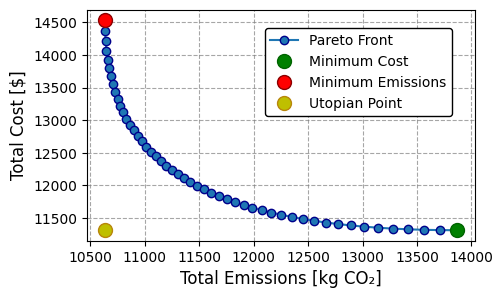

In [6]:
# Import the module
from figures.optimization_figures import solve_pareto_front, plot_pareto_front

# Solve the Pareto front
costs, emissions = solve_pareto_front()

# Plot the Pareto front
plot_pareto_front(costs, emissions)